<a href="https://colab.research.google.com/github/JoeOlang/Drafts/blob/master/Vision/notebook_cats_vs_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Colab Notebooks/Computer Vision/Cats&Dogs"
%cd /content/drive/MyDrive/Colab Notebooks/Computer Vision/Cats&Dogs
!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition
!unzip \*.zip  && rm *.zip    #unzipping the zip files and deleting the zip files

Streaming output truncated to the last 5000 lines.
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/dog.552.jpg       
  inflating: train/dog.5520.jpg      
  inflating: train/dog.5521.jpg      

In [3]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import os
import random
import gc

In [7]:
train_dir = '/content/drive/MyDrive/Colab Notebooks/Computer Vision/Cats&Dogs/train'
test_dir = '/content/drive/MyDrive/Colab Notebooks/Computer Vision/Cats&Dogs/test'

train_dogs = ['/content/drive/MyDrive/Colab Notebooks/Computer Vision/Cats&Dogs/train/{}'.format(i) for i in os.listdir(train_dir) if 'dog' in i]
train_cats = ['/content/drive/MyDrive/Colab Notebooks/Computer Vision/Cats&Dogs/train/{}'.format(i) for i in os.listdir(train_dir) if 'cat' in i]

test_images = ['/content/drive/MyDrive/Colab Notebooks/Computer Vision/Cats&Dogs/test/{}'.format(i) for i in os.listdir(test_dir)]

train_imgs = train_dogs[:2000] + train_cats[:2000]
random.shuffle(train_imgs)

del train_dogs
del train_cats
gc.collect()

8

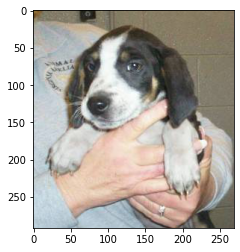

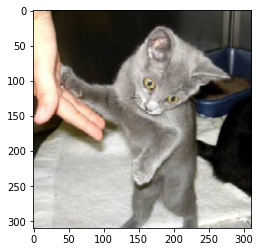

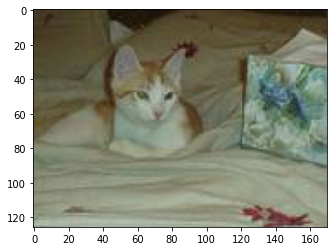

In [13]:
import matplotlib.image as mpimg
for ima in train_imgs[0:3]:
    img = mpimg.imread(ima)
    imgplot = plt.imshow(img)
    plt.show()

In [15]:
# Resize images, we be using a coloured image fam 🎃
nrows = 150
ncolumns = 150
channels = 3    # colour-RGB. channel, change to 1 for grayscale aka b&w


In [16]:
# read- resize function
def process_img(list_of_imgs):

    X = []  #Rsized images
    y = []  #Labels

    for image in list_of_imgs:
        X.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (nrows, ncolumns), interpolation = cv2.INTER_CUBIC))   #read image
        # get labels
        if 'dog' in image:
            y.append(1)
        elif 'cat' in image:
            y.append(0)

    return X, y

In [17]:
X, y = process_img(train_imgs)

In [24]:
y[:11]

[1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1]

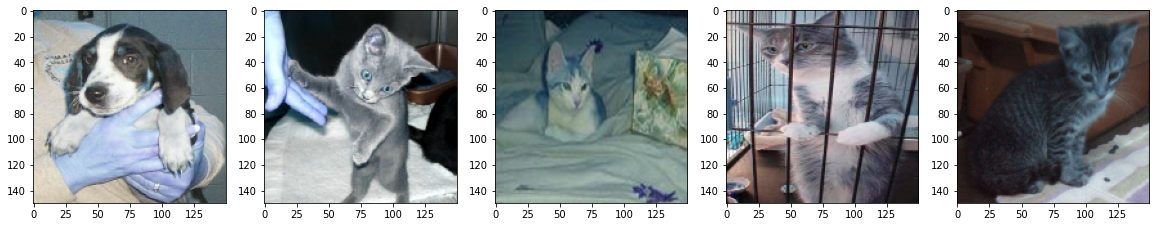

In [31]:
# Plot first 10 imgs to check if labels match
plt.figure(figsize=(20, 10))
columns = 5
for i in range(columns):
    plt.subplot(5 / columns + 1, columns, i + 1)
    plt.imshow(X[i])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Labels')

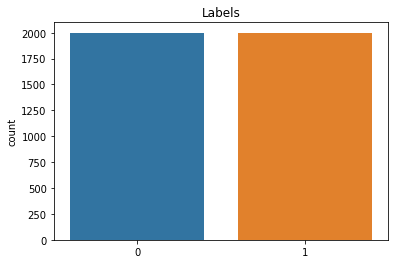

In [32]:
import seaborn as sns
del train_imgs
gc.collect()

# Convert to NDarray
X = np.array(X)
y = np.array(y)

# Plot Labels
sns.countplot(y)
plt.title('Labels')

In [33]:
print('Train Shape', X.shape)   # batch size, height, width and channels
print('Label Shape', y.shape)

Train Shape (4000, 150, 150, 3)
Label Shape (4000,)


In [35]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=2)

print('Train Shape', X_val.shape)  
print('Label Shape', y_train.shape)


Train Shape (800, 150, 150, 3)
Label Shape (3200,)


In [36]:
# clear memory
del X
del y
gc.collect()


# get lenght of train and validation data
ntrain = len(X_train)
nval = len(X_val)

# we then use a batch size of 32. normaly this is a factor of 2 i.e. 2, 4, 8, 16, etc
batch_size = 32


In [37]:
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img

In [38]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))  # Dropout for regularzation, Randomly drop 5 layers
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))    # Sigmoid since we only have two possible classes

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [40]:
# Compile our model
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])    #1e-4 == 0.0001

In [41]:
# augmentaion config, to help with reducing overfitting given the small dataset
train_datagen = ImageDataGenerator(rescale=1./255, # Scale the image between 0 and 1
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip = True,)

val_datagen = ImageDataGenerator(rescale=1./255)    # We dont augment validation data, we only peform rescale

In [42]:
train_generator = train_datagen.flow(X_train, y_train, batch_size=batch_size)
val_generator = val_datagen.flow(X_val, y_val, batch_size=batch_size)

In [46]:
# training

history = model.fit_generator(train_generator,
                              steps_per_epoch = ntrain // batch_size,
                              epochs = 64,
                              validation_data = val_generator,
                              validation_steps = nval // batch_size)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/64
100/100 [==============================] - 167s 2s/step - loss: 0.6957 - acc: 0.5206 - val_loss: 0.6852 - val_acc: 0.5150
Epoch 2/64
100/100 [==============================] - 164s 2s/step - loss: 0.6813 - acc: 0.5665 - val_loss: 0.6849 - val_acc: 0.5437
Epoch 3/64
100/100 [==============================] - 164s 2s/step - loss: 0.6669 - acc: 0.5856 - val_loss: 0.6503 - val_acc: 0.6037
Epoch 4/64
100/100 [==============================] - 163s 2s/step - loss: 0.6570 - acc: 0.6089 - val_loss: 0.6437 - val_acc: 0.6313
Epoch 5/64
100/100 [==============================] - 164s 2s/step - loss: 0.6284 - acc: 0.6431 - val_loss: 0.6615 - val_acc: 0.6012
Epoch 6/64
100/100 [==============================] - 164s 2s/step - loss: 0.6206 - acc: 0.6662 - val_loss: 0.6006 - val_acc: 0.6762
Epoch 7/64
100/100 [==============================] - 164s 2s/step - loss: 0.6137 - acc: 0.6667 - val_loss: 0.5834 - val_acc: 0.6938
Epoch 8/64
100/100 [==============================] - 164s 2s/step - 

In [47]:
# saving the model for later use
model.save_weights('/content/drive/MyDrive/Colab Notebooks/Computer Vision/Cats&Dogs/model_weights.h5')
model.save('/content/drive/MyDrive/Colab Notebooks/Computer Vision/Cats&Dogs/model_keras.h5')

In [48]:
history

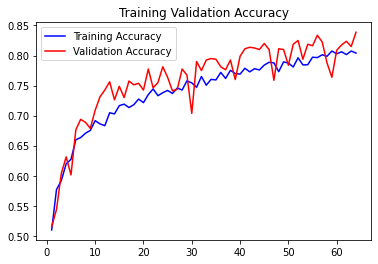

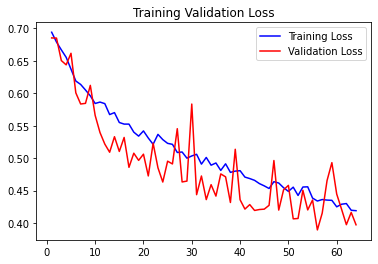

In [49]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training Validation Accuracy')
plt.legend()

plt.figure()


plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training Validation Loss')
plt.legend()

plt.show()